`PPO Vanilla Implementation`
source: https://github.com/ericyangyu/PPO-for-Beginners

In [ ]:
## ENSURE THAT PYTHON VERSION IS >=3.9 for requirements.txt to work properly
## IF RUNNING ON COLAB, SET TO TRUE
running_on_colab = False

if running_on_colab:
    from google.colab import drive
    drive.flush_and_unmount()
    drive.mount('/content/drive')
    ## For shared folders, go to the shared folder_name, right click, organize add shortcut, all locations, My Drive
    folder_path = "/content/drive/path/to/your/drive/folder"
    %cd folder_path

    ## The below folder path is for our team's shared drive folder. All others please comment this out.
    folder_path = "/content/drive/My Drive/DRL_Project/Project_Files/"
    %cd folder_path
else:
    folder_path = "path/to/your/folder"
    %cd folder_path

[Errno 2] No such file or directory: 'folder_path'
/Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementation
[Errno 2] No such file or directory: 'folder_path'
/Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementation


In [3]:
!pip install -r requirements.txt

  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (4.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (116 kB)
  Using cached pygame-2.6.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached torch-2.6.0-cp313-none-macosx_11_0_arm64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached Farama_Notifications-0.0.4-py

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%pip install "gymnasium[mujoco]"

  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached etils-1.12.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached glfw-2.8.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38.p39.p310.p311.p312.p313-none-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached PyOpenGL-3.1.9-py3-none-any.whl.metadata (3.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 10.9 MB/s eta 0:00:00a 0:00:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached glfw-2.8.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38.p39.p310.p311.p312.p313-none-macosx_11_0_arm64.whl (102 kB)
Using cached PyOpenGL-3.1.9-py3-none-any.whl (3.2 MB)
Using cached etils-1.12.2-py3-none-any.whl (167 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Note: you

In [6]:
import gymnasium as gym
import sys
import torch

from arguments import get_args
from custom_ppo import PPO
from network import FeedForwardNN
from eval_policy import eval_policy

In [7]:
class DictObject:
    def __init__(self, d=None):
        if d is not None:
            for key, value in d.items():
                setattr(self, key, value)


In [8]:
def train(timesteps, env, hyperparameters):
	print(f"Training starting...", flush=True)

	model = PPO(env=env, **hyperparameters)
	metadata = model.learn(total_timesteps=timesteps)

	return metadata


In [9]:
def main(args):
	hyperparameters = {
		'timesteps_per_batch': 2048,
		'max_timesteps_per_episode': 200,
		'gamma': 0.99,
		'n_updates_per_iteration': 10,
		'lr': 3e-4,
		'clip': 0.2,
		'render': False,
		'render_every_i': 10,
		'actor_save_path': f"'{args.actor_save_path}'",
		'critic_save_path': f"'{args.critic_save_path}'",
		'use_checkpoints': args.use_checkpoints
	}

	env = gym.make(args.env, render_mode='rgb_array')

	metadata = train(timesteps=args.timesteps, env=env, hyperparameters=hyperparameters)
	return metadata

In [10]:
import matplotlib.pyplot as plt
def graph_metadata(metadata):
  timesteps = [entry['timesteps'] for entry in metadata]
  avg_rewards = [entry['average_episode_rewards'] for entry in metadata]
  avg_loss = [entry['avg_actor_loss'] for entry in metadata]


  plt.figure(figsize=(8, 6))
  plt.plot(timesteps, avg_rewards, marker='o', linestyle='-', label='Average Episode Reward')
  plt.title("Average Episode Reward vs. Timesteps")
  plt.xlabel("Timesteps")
  plt.ylabel("Average Episode Reward")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.plot(timesteps, avg_loss, marker='o', linestyle='-', color='r', label='Average Actor Loss')
  plt.title("Average Actor Loss vs. Timesteps")
  plt.xlabel("Timesteps")
  plt.ylabel("Average Actor Loss")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/poo3/lib/python3.13/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 200000 timesteps


/Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementation/custom_ppo.py:126: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  batch_obs = torch.tensor(batch_obs, dtype=torch.float)


Saved models to /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/rishigaddamanugu/Desktop/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/rishigaddama

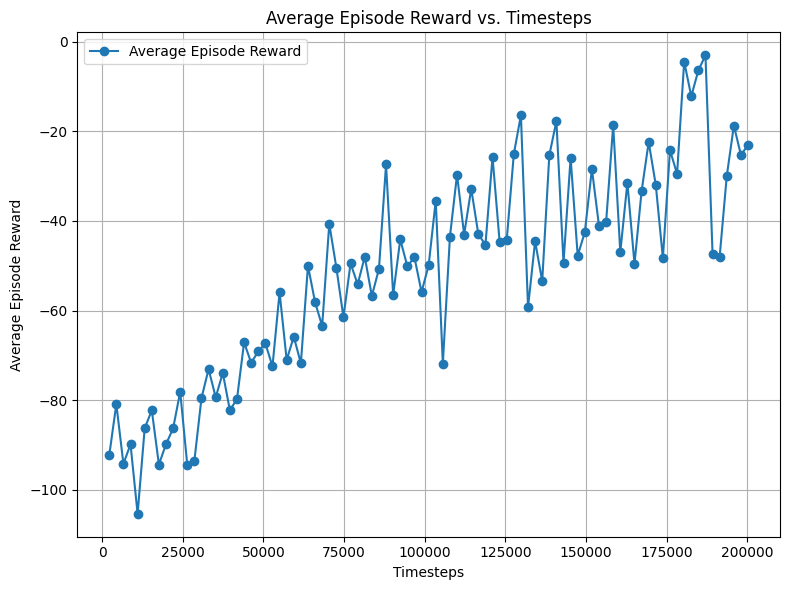

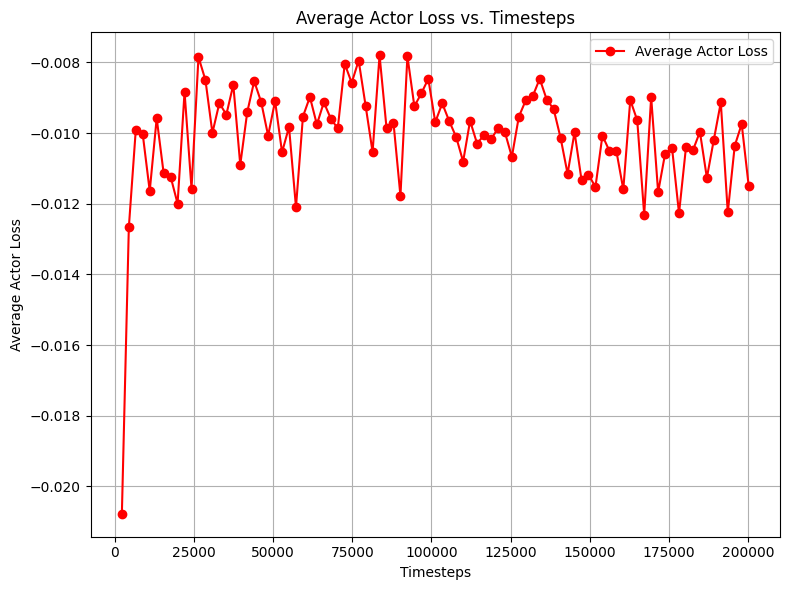

In [11]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
args = {
    'env': 'HalfCheetah-v4',
    'actor_save_path': folder_path + 'HalfCheetah_ppo_actor.pth',
    'critic_save_path': folder_path + 'HalfCheetah_ppo_critic.pth',
    'use_checkpoints': False,
    'timesteps': 200_000
}

args = DictObject(args)
cheetah_metadata = main(args)
graph_metadata(cheetah_metadata)

In [ ]:
environments = {
    "HalfCheetah": (17, 6, "HalfCheetah-v4"),
    "Hopper": (11, 3, "Hopper-v4"),
    "InvertedDoublePendulum":(9, 1, "InvertedDoublePendulum-v4"),
    "InvertedPendulum":(4, 1, "InvertedPendulum-v4"),
    "Reacher":(10, 2, "Reacher-v4"),
    "Swimmer":(8, 2, "Swimmer-v4"),
    "Walker2d":(17, 6, "Walker2d-v4"),
}

env_args = {}
for env_name, (obs_dim, action_dim, env_version) in environments.items():
    args = {
        'env': env_version,
        'actor_save_path': f'{folder_path}{env_name}_ppo_actor.pth',
        'critic_save_path': f'{folder_path}{env_name}_ppo_critic.pth',
        'use_checkpoints': False,
        'timesteps': 1e6
    }

    env_args[env_name] = DictObject(args)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved m

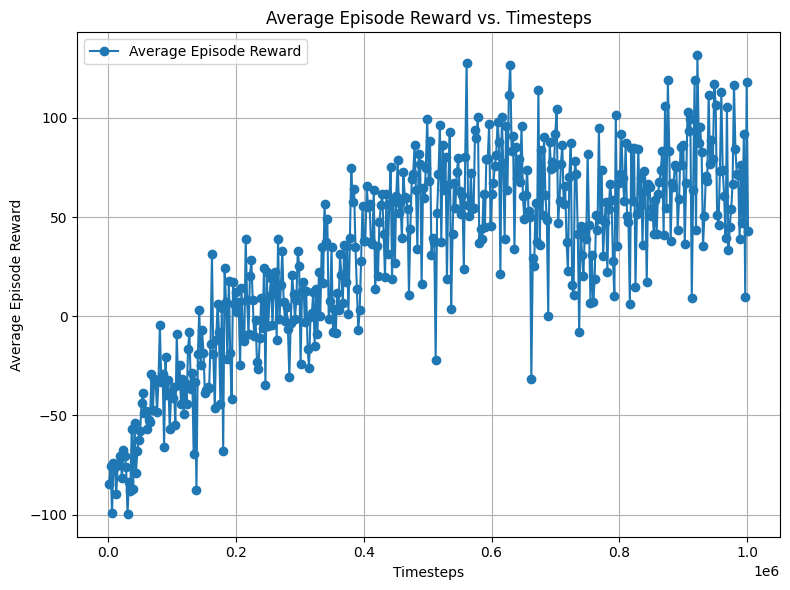

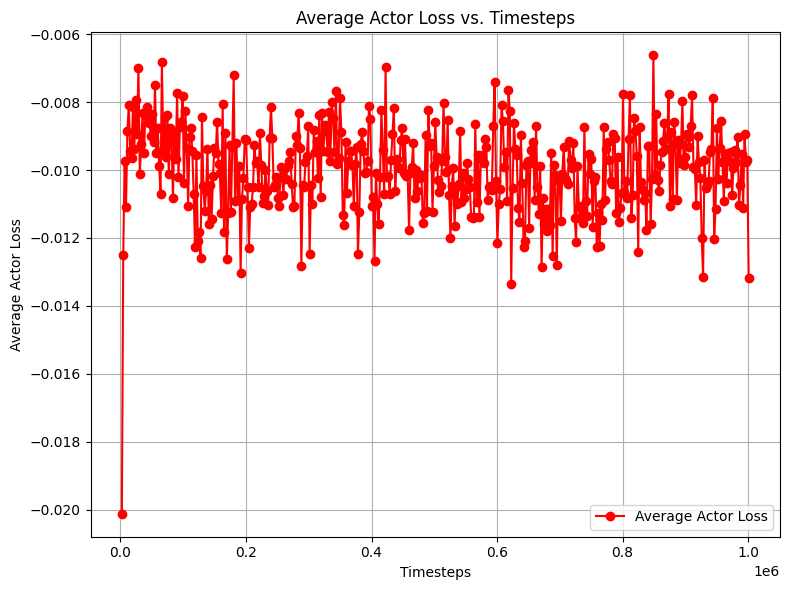

In [ ]:
args = env_args["HalfCheetah"]
metadata = main(args)
graph_metadata(metadata)

In [ ]:
args = env_args["Hopper"]
metadata = main(args)
graph_metadata(metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Proje

KeyboardInterrupt: 

In [ ]:
args = env_args["InvertedDoublePendulum"]
metadata = main(args)
graph_metadata(metadata)

In [ ]:
args = env_args["InvertedPendulum"]
metadata = main(args)
graph_metadata(metadata)

In [ ]:
args = env_args["Reacher"]
metadata = main(args)
graph_metadata(metadata)

In [ ]:
# args = env_args["Swimmer"]
# metadata = main(args)
# metadata

In [ ]:
args = env_args["Walker2d"]
metadata = main(args)
graph_metadata(metadata)